In [23]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import numpy as np

In [2]:
X, y = make_moons(n_samples=1000, noise=0.05)

In [5]:
X

array([[ 0.74381706, -0.47731414],
       [ 0.94963607,  0.5273093 ],
       [-0.01609881,  0.39047128],
       ...,
       [ 0.83393838,  0.71640862],
       [ 2.01645653,  0.49778193],
       [ 0.19327114,  0.93029942]])

In [11]:
y.shape

(1000,)

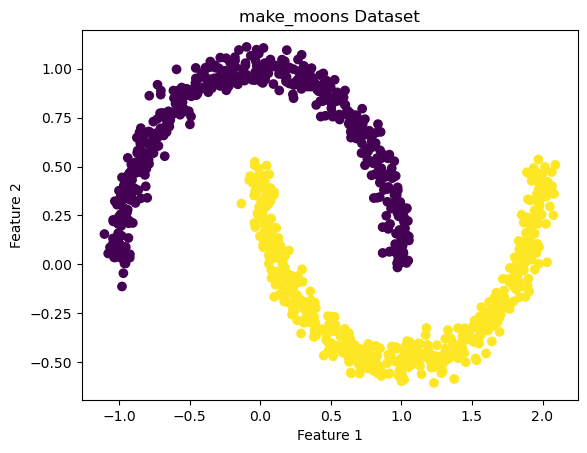

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('make_moons Dataset')
plt.show()

In [9]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [12]:
dbscan.labels_

array([ 0,  1,  2,  3,  1,  3,  1, -1,  2,  1,  3,  0,  1,  0,  3,  1,  3,
        1,  4,  4,  3,  1,  0,  1, -1,  3,  0,  0, -1, -1,  4,  1, -1,  4,
        1,  1,  3,  1,  3,  1,  1,  4, -1,  1,  1,  1,  1,  1, -1,  4,  0,
        1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0,  3,  1,  3,  1,  1,  4,
        0,  1,  2,  1,  4,  2,  1,  3,  4,  0, -1,  3,  1,  1,  0,  1,  1,
        1,  4,  1,  2,  3,  3,  3,  1,  1,  2,  0,  1,  0,  1,  1,  1,  3,
        4,  0,  1,  1,  1,  3,  1,  2,  1,  4,  1,  2,  1,  1,  1,  4,  1,
        3,  1,  1,  0,  1,  0,  0,  1,  0,  1,  3,  0,  3,  1,  1,  0,  2,
        1,  1,  0,  4,  0,  3,  1,  1,  4,  1,  4,  4,  1,  0, -1,  1,  3,
        1,  1,  3,  2,  0,  3,  1,  2,  1,  1,  1,  0,  0,  1,  1,  0,  3,
        3,  1,  2,  1,  3,  1,  3,  1,  1,  2, -1,  0,  1,  1,  2,  1, -1,
        1,  1, -1,  0,  7,  1,  1,  5,  1,  0,  3,  3,  3, -1,  0,  1,  4,
        6,  0,  1,  0, -1,  0,  3,  1, -1,  0,  1,  1,  1,  2,  1,  1,  0,
        4, -1,  1,  1,  1

In [19]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  14,
        15,  16,  17,  19,  20,  21,  22,  23,  25,  26,  27,  30,  31,
        33,  34,  35,  36,  37,  38,  39,  41,  43,  44,  45,  46,  49,
        50,  51,  52,  53,  54,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  67,  68,  69,  71,  72,  74,  75,  76,  77,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  91,  92,  93,  94,
        95,  96,  97,  99, 100, 101, 102, 104, 105, 107, 108, 109, 110,
       111, 112, 115, 116, 117, 118, 119, 120, 121, 124, 125, 126, 127,
       129, 130, 131, 132, 133, 134, 136, 140, 141, 143, 144, 145, 146,
       147, 148, 152, 153, 154, 155, 157, 158, 159, 161, 162, 164, 165,
       166, 167, 168, 169, 171, 172, 173, 174, 176, 177, 178, 179, 181,
       183, 184, 185, 187, 190, 192, 193, 195, 197, 198, 199, 201, 202,
       203, 205, 206, 209, 210, 211, 214, 215, 216, 217, 218, 221, 223,
       224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 23

In [20]:
dbscan.components_

array([[ 0.74381706, -0.47731414],
       [ 0.94963607,  0.5273093 ],
       [-0.01609881,  0.39047128],
       ...,
       [ 1.98707233,  0.40579743],
       [ 0.88719088,  0.45130117],
       [ 0.19327114,  0.93029942]])

In [21]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

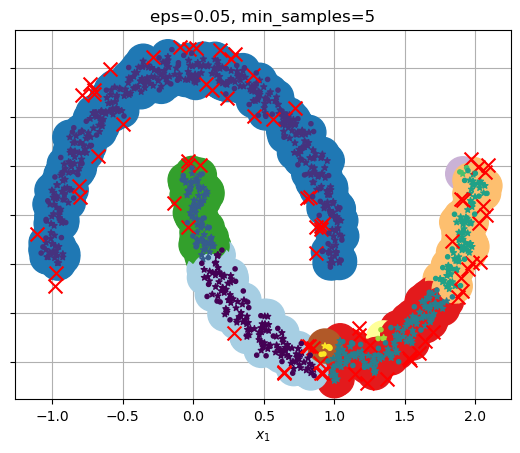

In [24]:
plot_dbscan(dbscan, X, size=600, show_ylabels=False)

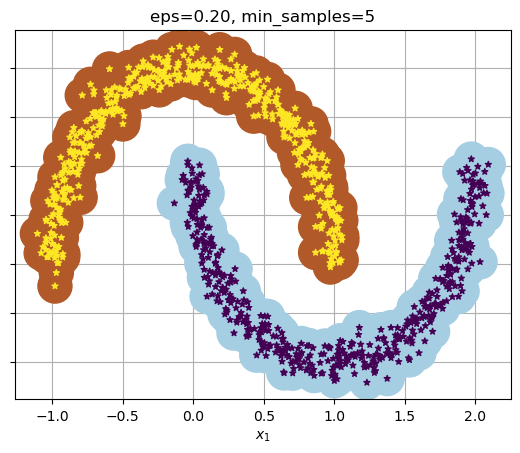

In [30]:
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)  
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)